# 十分钟强化学习第一讲：基本概念

## 本系列特点：
- 侧重基础知识
- 侧重代码来理解
- 用代码实现环境
- 用代码实现算法

## 1 人工智能、机器学习和强化学习

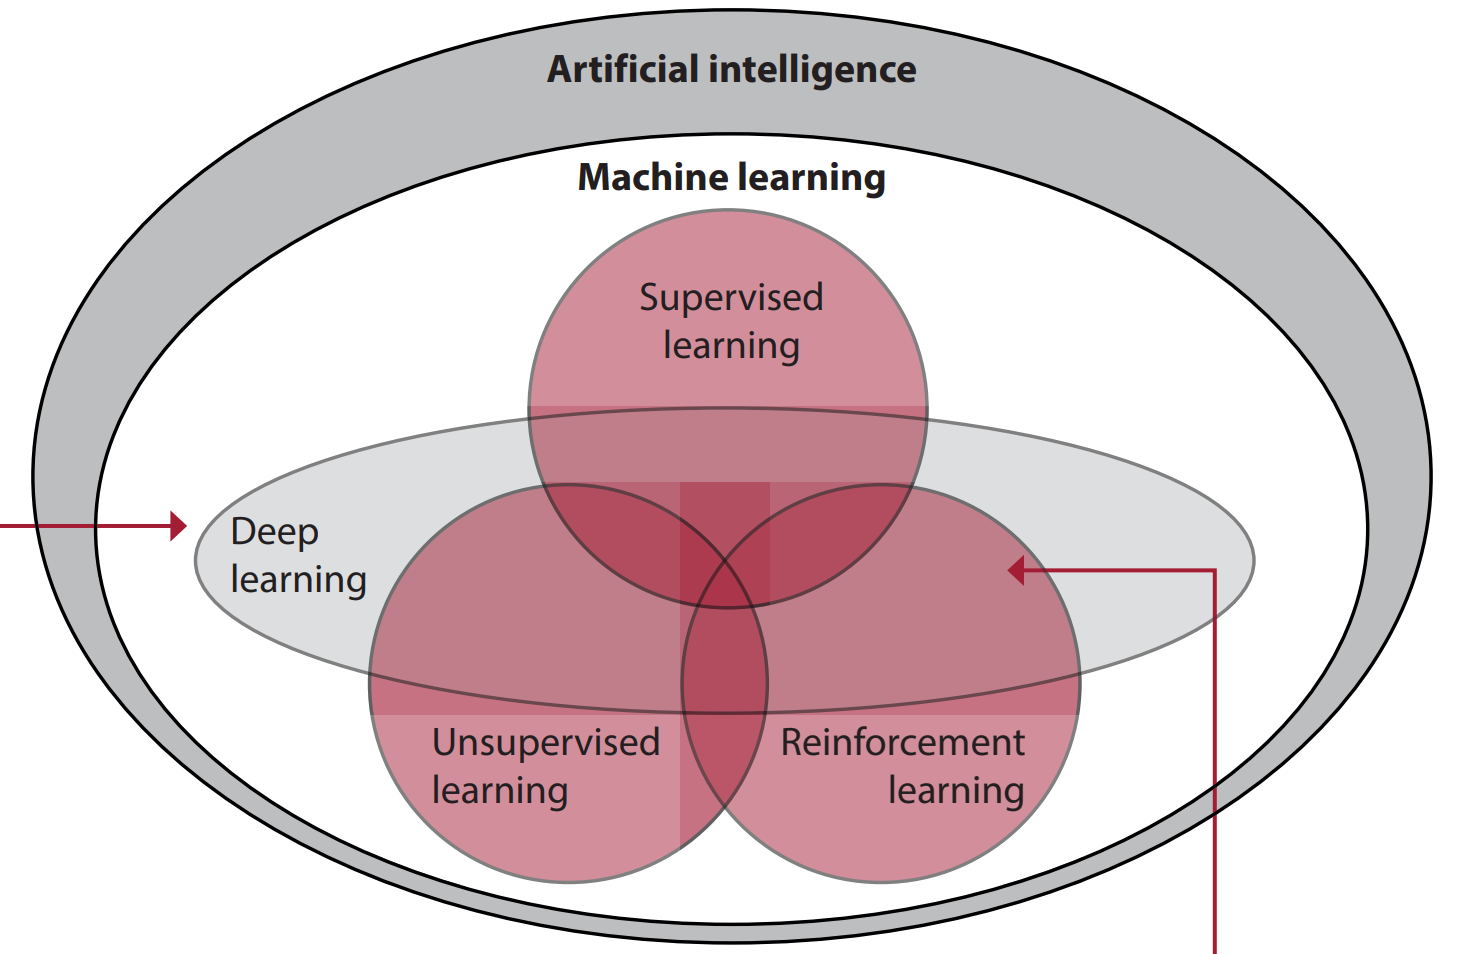

### 强化学习是通过试错来学习如何决策
### 深度强化学习（DRL）是神经网络（工具）+ 强化学习（思路）

## 2 Agent和Environment

###  Agent: 负责决策的程序
### Environment：不被程序控制的外部世界

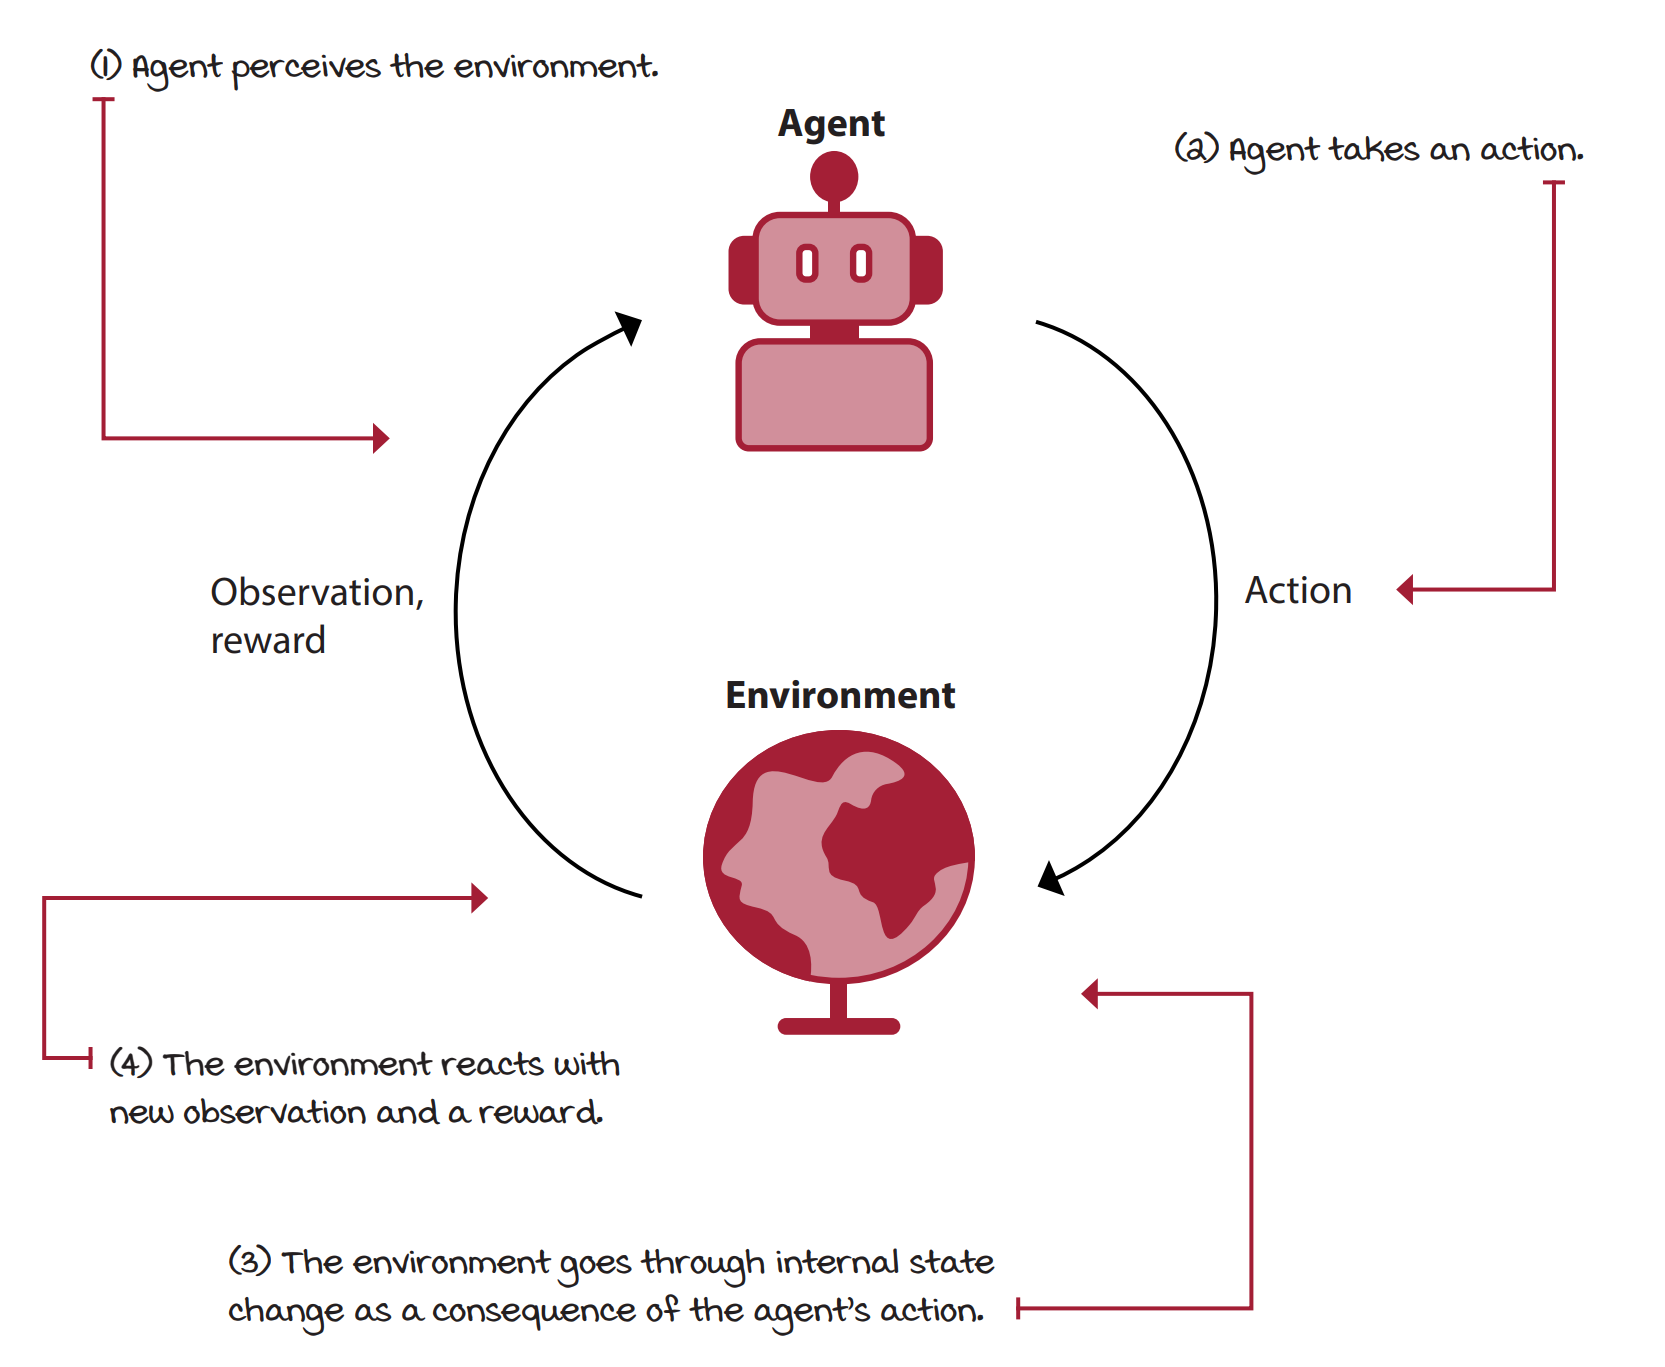

### Environment 相关概念 
- State: 用于表达环境状态的一组变量 (observation)
- Action：决策时可供选择的行动
- Reward：环境收到agent的action后的反馈信号。
- Transition Function：(state, action)  ->  new state
- Reward Function: (state, action) -> reward
- Time Step: Agent和environment的一次交互。（观察state -> action -> reward & new state）
- Discount：对未来回报的折现，有利于更准确的评估。折现率反映了agent的偏好。
- MDP: 是定义环境如何运转的引擎（命运的齿轮）。上述所有元素定义了一个MDP。

### Agent 相关概念
- Policy Function: state -> action
- Value Function: state -> value 或者 (state, action) -> value

## 3 强化学习的特点：Trial-and-error Learning

- sequential feedback。 reward信号是滞后的，导致agent不知道哪个state下选择哪个action是有利的。
  
- evaluative feedback。agent得到的信息不足，而且受限于自己的行动。需要 exploration versus exploitation trade-off

- sampled feedback。agent得到的信息是采样得到的，可能是有偏差的。

## 4 用冰湖问题理解概念

![Alt text](frozen_lake.gif)

In [2]:
import random
import numpy as np

In [1]:
class FrozenLake:

    def __init__(self):
        self.reset()
        self.set_tran()

    def reset(self):
        self.position = 0
        self.set_map()
        return self.position

    def set_map(self):
        self.map = list(range(16))
        self.map[self.position] = "*"

    # 0: left, 1: down, 2:right, 3:up
    def set_tran(self):
        self.transition = {
            0: {
                0: [(0.6666666666666666, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False)
                ],
                1: [(0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False)
                ],
                2: [(0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 0, 0.0, False)
                ],
                3: [(0.3333333333333333, 1, 0.0, False),
                    (0.6666666666666666, 0, 0.0, False)
                ]
            },
            1: {
                0: [(0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ],
                1: [(0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False)
                ],
                2: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False)
                ],
                3: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 0, 0.0, False)
                ]
            },
            2: {
                0: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 6, 0.0, False)
                ],
                1: [(0.3333333333333333, 1, 0.0, False),
                    (0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 3, 0.0, False)
                ],
                2: [(0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False)
                ],
                3: [(0.3333333333333333, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 1, 0.0, False)
                ]
            },
            3: {
                0: [(0.3333333333333333, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True)
                ],
                1: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True),
                    (0.3333333333333333, 3, 0.0, False)
                ],
                2: [(0.3333333333333333, 7, 0.0, True),
                    (0.6666666666666666, 3, 0.0, False)
                ],
                3: [(0.6666666666666666, 3, 0.0, False),
                    (0.3333333333333333, 2, 0.0, False)
                ]
            },
            4: {
                0: [(0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False)
                ],
                1: [(0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ],
                2: [(0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 0, 0.0, False)
                ],
                3: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 0, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False)
                ]
            },
            5: {
                0: [(1.0, 5, 0, True)],
                1: [(1.0, 5, 0, True)],
                2: [(1.0, 5, 0, True)],
                3: [(1.0, 5, 0, True)]
            },
            6: {
                0: [(0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 10, 0.0, False)
                ],
                1: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True)
                ],
                2: [(0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 7, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False)
                ],
                3: [(0.3333333333333333, 7, 0.0, True),
                    (0.3333333333333333, 2, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ]
            },
            7: {
                0: [(1.0, 7, 0, True)],
                1: [(1.0, 7, 0, True)],
                2: [(1.0, 7, 0, True)],
                3: [(1.0, 7, 0, True)]
            },
            8: {
                0: [(0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True)
                ],
                1: [(0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 9, 0.0, False)
                ],
                2: [(0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False)
                ],
                3: [(0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 4, 0.0, False),
                    (0.3333333333333333, 8, 0.0, False)
                ]
            },
            9: {
                0: [(0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False)
                ],
                1: [(0.3333333333333333, 8, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 10, 0.0, False)
                ],
                2: [(0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True)
                ],
                3: [(0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 5, 0.0, True),
                    (0.3333333333333333, 8, 0.0, False)
                ]
            },
            10: {
                0: [(0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False)
                ],
                1: [(0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 11, 0.0, True)
                ],
                2: [(0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 11, 0.0, True),
                    (0.3333333333333333, 6, 0.0, False)
                ],
                3: [(0.3333333333333333, 11, 0.0, True),
                    (0.3333333333333333, 6, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False)
                ]
            },
            11: {
                0: [(1.0, 11, 0, True)],
                1: [(1.0, 11, 0, True)],
                2: [(1.0, 11, 0, True)],
                3: [(1.0, 11, 0, True)]
            },
            12: {
                0: [(1.0, 12, 0, True)],
                1: [(1.0, 12, 0, True)],
                2: [(1.0, 12, 0, True)],
                3: [(1.0, 12, 0, True)]
            },
            13: {
                0: [(0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 13, 0.0, False)
                ],
                1: [(0.3333333333333333, 12, 0.0, True),
                    (0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False)
                ],
                2: [(0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False)
                ],
                3: [(0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 9, 0.0, False),
                    (0.3333333333333333, 12, 0.0, True)
                ]
            },
            14: {
                0: [(0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False)
                ],
                1: [(0.3333333333333333, 13, 0.0, False),
                    (0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 15, 1.0, True)
                ],
                2: [(0.3333333333333333, 14, 0.0, False),
                    (0.3333333333333333, 15, 1.0, True),
                    (0.3333333333333333, 10, 0.0, False)
                ],
                3: [(0.3333333333333333, 15, 1.0, True),
                    (0.3333333333333333, 10, 0.0, False),
                    (0.3333333333333333, 13, 0.0, False)
                ]
            },
            15: {
                0: [(1.0, 15, 0, True)],
                1: [(1.0, 15, 0, True)],
                2: [(1.0, 15, 0, True)],
                3: [(1.0, 15, 0, True)]
            }
        }

    def show(self):
        print(f"state: {self.position}")
        self.set_map()
        for i, s in enumerate(self.map):
            print("| ", end="")
            if s == "*":
                print(s, "".rjust(4), end=" ")
            else:
                print(str(s).zfill(2), "".rjust(3), end=" ")
            if (i + 1) % 4 == 0: print("|")


    def step(self,action):
        node = self.transition[self.position][action]
        probs,states,rewards,dones = zip(*node)
        choice = random.choices(population=states,weights=probs,k=1)[0]
        i = states.index(choice)
        self.position = states[i]
        return states[i], rewards[i], dones[i]

In [3]:
env = FrozenLake()

In [4]:
env.show()

state: 0
| *      | 01     | 02     | 03     |
| 04     | 05     | 06     | 07     |
| 08     | 09     | 10     | 11     |
| 12     | 13     | 14     | 15     |


In [5]:
env.step(1)

(1, 0.0, False)

In [6]:
env.show()

state: 1
| 00     | *      | 02     | 03     |
| 04     | 05     | 06     | 07     |
| 08     | 09     | 10     | 11     |
| 12     | 13     | 14     | 15     |


In [7]:
class Random_Agent:
    def __init__(self):
        self.policy_dict = {k:v for k in range(16) for v in random.choices(population=range(4),k=16)}
    
    def action(self, state):
        return self.policy_dict[state]

In [8]:
agent = Random_Agent()

In [9]:
def test_game(env, pi, n_episodes=100, max_steps=100):
    results = []
    for _ in range(n_episodes):
        state= env.reset()
        Done = False
        steps = 0
        while not Done and steps < max_steps:
            action = pi(state)
            state, reward, Done = env.step(action)
            steps += 1
        results.append(reward>0)
    return np.sum(results)/len(results)

In [10]:
test_game(env, agent.action)

0.01

## 5 参考阅读


《grokking Deep Reinforcement Learning》